In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

# File paths (Research_project folder ke andar)
path_traffic_congestion = '/content/drive/MyDrive/Research_project/17 Gaële Lesteven - Traffic Congestion in Mumbai, Will Pu....pdf'
path_IJIRT_paper = '/content/drive/MyDrive/Research_project/IJIRT176698_PAPER.pdf'
path_mumbai_challans = '/content/drive/MyDrive/Research_project/mumbai-challans-2024.pdf'
path_traffic_responses = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
path_research_paper = '/content/drive/MyDrive/Research_project/reserch paper.pdf'
path_traffic_webinar = '/content/drive/MyDrive/Research_project/Taming-Traffic-Webinar-3-Congestion-Pricing-in-Mumbai.pdf'
path_uwi_congestion = '/content/drive/MyDrive/Research_project/UWI-Congestion_Pricing_to_Decongest_Mumbai_c.pdf'

# Example: Excel file load karna
import pandas as pd
df_responses = pd.read_excel(path_traffic_responses, sheet_name='Form Responses 1')

# Agar PDFs ko read karna hai, toh PyPDF2 ya pdfplumber libraries install kar ke use kar sakte hain
# Example install command (Colab notebook mein):
# !pip install PyPDF2
# or
# !pip install pdfplumber


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
df = pd.read_excel(file_path, sheet_name='Form Responses 1')
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                Timestamp                         Email              Name   \
0 2025-08-15 12:15:09.867    ashokkanojiya320@gmail.com    Ashok Kanojiya    
1 2025-08-15 12:15:29.358      neetupandey582@gmail.com      Neetu pandey    
2 2025-08-15 12:19:29.157       ankit233kumar@gmail.com       Ankit Kumar    
3 2025-08-15 12:20:09.399     aditimahamulkar@gmail.com  Aditi Mahamulkar    
4 2025-08-15 12:22:01.695  e1062240119@timscdrmumbai.in     Dhanush Dhotre   

  What is Your age Group  Gender How often do you travel within Mumbai?    \
0            18–25 years    Male                                    Daily   
1            18–25 years  Female                                    Daily   
2            18–25 years    Male                         1–3 times a week   
3            18–25 years  Female                                    Daily   
4            18–2

In [ ]:
import pandas as pd

# Step 1: Upload file manually in Colab
from google.colab import files
uploaded = files.upload()

# Step 2: Load the uploaded Excel file (adjust filename as per upload)
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Form Responses 1')

# Step 3: Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Step 4: Display initial data info and sample
print("Initial Data Info:")
print(df.info())
print("\nSample Data:")
print(df.head())

# Step 5: Drop columns not useful for modeling
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_clean = df.drop(columns=drop_cols)

# Step 6: Drop rows with missing values
df_clean = df_clean.dropna()

# Step 7: Convert categorical columns to numerical codes
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Step 8: Show cleaned data info and sample
print("\nCleaned Data Info:")
print(df_clean.info())
print("\nCleaned Data Sample:")
print(df_clean.head())

# Step 9: Save cleaned data for future model training
df_clean.to_csv('cleaned_traffic_data.csv', index=False)


Saving Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx to Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx
Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 16 columns):
 #   Column                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                        --------------  -----         
 0   Timestamp                                                                                                     57 non-null     datetime64[ns]
 1   Email                                                                                                         57 non-null     object        
 2   Name                                                                                                          57 non-null     object        
 3   W

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Upload and load cleaned dataset if you saved it before, or load original and clean here
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name, sheet_name='Form Responses 1')

# Step 2: Clean the data
df.columns = df.columns.str.strip()
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_clean = df.drop(columns=drop_cols)
df_clean = df_clean.dropna()

# Step 3: Encode categorical columns numerically
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Step 4: Define features and target
X = df_clean.drop(columns=['How severe do you think traffic congestion is in Mumbai?'])
y = df_clean['How severe do you think traffic congestion is in Mumbai?']

# Step 5: Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Saving Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx to Predicting Traffic Congestion in Mumbai Using AI (Responses) (1).xlsx
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.37      0.37      0.35        12
weighted avg       0.52      0.58      0.52        12



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib

# Save model to file
joblib.dump(model, 'traffic_congestion_model.joblib')

# Later you can load it as:
# model = joblib.load('traffic_congestion_model.joblib')


['traffic_congestion_model.joblib']

In [ ]:
import datetime

# Example function to check if alert needed based on current time and predicted congestion
def check_traffic_alert(user_route, journey_start_time, model, feature_data):
    """
    user_route: str, user's regular travel route
    journey_start_time: datetime object, user planned start time
    model: trained ML model for prediction
    feature_data: dict or DataFrame of features for prediction for the route and time

    Returns: alert message or None
    """
    # Calculate alert time (30 mins before journey)
    alert_time = journey_start_time - datetime.timedelta(minutes=30)

    # Get current time
    current_time = datetime.datetime.now()

    if current_time >= alert_time:
        # Prepare features for prediction from feature_data
        # For example, encode user_route and other relevant features
        # Replace with actual feature extraction and preprocessing
        X = feature_data

        # Predict congestion probability/class
        prediction = model.predict(X)

        if prediction == 1:  # assuming 1 = congestion predicted
            return f"Alert: Traffic congestion expected on your route {user_route} at {journey_start_time}."
        else:
            return None
    else:
        return None

# Usage example (fill with actual inputs)
# alert = check_traffic_alert('Western Express Highway', datetime.datetime(2025, 9, 18, 8, 0), model, some_feature_data)
# if alert:
#     print(alert)


In [ ]:
!pip install pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 42.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

# List uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')


Saving 17 Gaële Lesteven - Traffic Congestion in Mumbai, Will Public Authorities take the Opportunity to Leapfrog.pdf to 17 Gaële Lesteven - Traffic Congestion in Mumbai, Will Public Authorities take the Opportunity to Leapfrog.pdf
Saving IJIRT176698_PAPER.pdf to IJIRT176698_PAPER.pdf
Saving mumbai-challans-2024.pdf to mumbai-challans-2024.pdf
Saving reserch paper.pdf to reserch paper.pdf
Saving Taming-Traffic-Webinar-3-Congestion-Pricing-in-Mumbai_8.11.21.pptx.pdf to Taming-Traffic-Webinar-3-Congestion-Pricing-in-Mumbai_8.11.21.pptx.pdf
Saving UWI-Congestion_Pricing_to_Decongest_Mumbai_c.pdf to UWI-Congestion_Pricing_to_Decongest_Mumbai_c.pdf
Uploaded file: 17 Gaële Lesteven - Traffic Congestion in Mumbai, Will Public Authorities take the Opportunity to Leapfrog.pdf
Uploaded file: IJIRT176698_PAPER.pdf
Uploaded file: mumbai-challans-2024.pdf
Uploaded file: reserch paper.pdf
Uploaded file: Taming-Traffic-Webinar-3-Congestion-Pricing-in-Mumbai_8.11.21.pptx.pdf
Uploaded file: UWI-Congest

In [ ]:
import fitz  # PyMuPDF
import pandas as pd
import re

pdf_files = [
    '17 Gaële Lesteven - Traffic Congestion in Mumbai, Will Public Authorities take the Opportunity to Leapfrog.pdf',
    'IJIRT176698_PAPER.pdf',
    'mumbai-challans-2024.pdf',
    'reserch paper.pdf',
    'Taming-Traffic-Webinar-3-Congestion-Pricing-in-Mumbai_8.11.21.pptx.pdf',
    'UWI-Congestion_Pricing_to_Decongest_Mumbai_c.pdf'
]

def extract_text(pdf_path):
    doc = fitz.open(pdf_path)
    full_text = ""
    for page in doc:
        full_text += page.get_text()
    return full_text

def extract_mentions(text, keywords):
    pattern = re.compile('|'.join(keywords), re.IGNORECASE)
    matches = pattern.findall(text)
    return len(matches)

extracted_data = []

for pdf_file in pdf_files:
    text = extract_text(pdf_file)
    accident_count = extract_mentions(text, ['accident', 'crash', 'collision', 'fatality', 'injury'])
    congestion_count = extract_mentions(text, ['congestion', 'traffic jam', 'gridlock'])

    extracted_data.append({
        'pdf_file': pdf_file,
        'accident_mentions': accident_count,
        'congestion_mentions': congestion_count
    })

df_secondary = pd.DataFrame(extracted_data)
df_secondary.to_csv('secondary_traffic_data.csv', index=False)
print(df_secondary)


                                            pdf_file  accident_mentions  \
0  17 Gaële Lesteven - Traffic Congestion in Mumb...                  0   
1                              IJIRT176698_PAPER.pdf                  1   
2                           mumbai-challans-2024.pdf                  0   
3                                  reserch paper.pdf                  1   
4  Taming-Traffic-Webinar-3-Congestion-Pricing-in...                  0   
5   UWI-Congestion_Pricing_to_Decongest_Mumbai_c.pdf                  1   

   congestion_mentions  
0                   23  
1                   18  
2                    0  
3                   81  
4                   34  
5                  613  


In [ ]:
import pandas as pd

# Load primary cleaned survey data CSV (assumes already cleaned and saved)
primary_df = pd.read_csv('cleaned_traffic_data.csv')

# Load secondary data CSV you just created
secondary_df = pd.read_csv('secondary_traffic_data.csv')

# For demo, we will merge datasets based on no common key, just add secondary features to every row
# You might want to join on common keys like dates, routes if you extract such info

for col in ['accident_mentions', 'congestion_mentions']:
    primary_df[col] = secondary_df[col].mean()  # Example: assign mean mentions as global features

print(primary_df.head())

# Now you can proceed to retrain your model with the enriched dataset (with secondary features)


   What is Your age Group  Gender  How often do you travel within Mumbai?  \
0                       0       1                                       2   
1                       0       0                                       2   
2                       0       1                                       0   
3                       0       0                                       2   
4                       0       1                                       2   

   On average, how much time do you spend in traffic daily?  \
0                                                  2          
1                                                  2          
2                                                  2          
3                                                  2          
4                                                  2          

   Which mode of transportation do you use most frequently?  \
0                                                  2          
1                               

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the enriched dataset after combining
df = pd.read_csv('cleaned_traffic_data.csv')

# Assuming you already merged secondary features into this CSV

# Define target and features again
target_col = 'How severe do you think traffic congestion is in Mumbai?'  # adjust if needed
X = df.drop(columns=[target_col])
y = df[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         1

    accuracy                           0.58        12
   macro avg       0.37      0.37      0.35        12
weighted avg       0.52      0.58      0.52        12



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load combined dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Define target and features
target_col = 'How severe do you think traffic congestion is in Mumbai?'
X = df.drop(columns=[target_col])
y = df[target_col]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest with class_weight balanced
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1

    accuracy                           0.50        12
   macro avg       0.20      0.29      0.24        12
weighted avg       0.35      0.50      0.41        12



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load combined dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Define target and features
target_col = 'How severe do you think traffic congestion is in Mumbai?'
X = df.drop(columns=[target_col])
y = df[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove rare class 1 from training
mask = y_train != 1
X_train_mod = X_train[mask]
y_train_mod = y_train[mask]

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_mod, y_train_mod)

# Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           2       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         1

    accuracy                           0.42        12
   macro avg       0.47      0.31      0.37        12
weighted avg       0.66      0.42      0.51        12



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Binary target: congested (labels 2, 3) vs not congested (0, 1)
df['binary_congestion'] = df['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

X = df.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df['binary_congestion']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Prepare binary target as before
df['binary_congestion'] = df['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

X = df.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df['binary_congestion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')

# Fit on training data
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Predict and evaluate on test data with best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Drop or encode necessary columns
categorical_cols = ['What is Your age Group', 'Gender', 'How often do you travel within Mumbai?',
                    'On average, how much time do you spend in traffic daily?',
                    'Which mode of transportation do you use most frequently?',
                    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
                    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
                    'Which features would you like most in an AI-based traffic prediction app?',
                    'In your opinion, can AI help reduce traffic congestion in Mumbai?']

df = pd.get_dummies(df, columns=categorical_cols)

# Continue with binary target and model training steps as before


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define model and parameter grid as before

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)


Best params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:48:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('cleaned_traffic_data.csv')

# Binary target: congested (2, 3) -> 1 else 0
df['binary_congestion'] = df['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

# Select categorical columns to encode
categorical_cols = ['What is Your age Group', 'Gender', 'How often do you travel within Mumbai?',
                    'On average, how much time do you spend in traffic daily?',
                    'Which mode of transportation do you use most frequently?',
                    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
                    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
                    'Which features would you like most in an AI-based traffic prediction app?',
                    'In your opinion, can AI help reduce traffic congestion in Mumbai?']

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols)

# Define features and target
X = df.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df['binary_congestion']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define Random Forest and parameter grid for tuning
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# GridSearch with 3-fold CV (reduce folds for speed if needed)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

print("Best hyperparameters:", grid_search.best_params_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


Best hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load the cleaned survey dataset CSV
df = pd.read_csv('cleaned_traffic_data.csv')

# Convert target to binary classes: congested (2,3) = 1, not congested (0,1) = 0
df['binary_congestion'] = df['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

# Columns to one-hot encode (categorical features)
categorical_cols = [
    'What is Your age Group',
    'Gender',
    'How often do you travel within Mumbai?',
    'On average, how much time do you spend in traffic daily?',
    'Which mode of transportation do you use most frequently?',
    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
    'Which features would you like most in an AI-based traffic prediction app?',
    'In your opinion, can AI help reduce traffic congestion in Mumbai?'
]

# One-hot encode these categorical features
df = pd.get_dummies(df, columns=categorical_cols)

# Define features and target
X = df.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df['binary_congestion']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the model and hyperparameters for tuning
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Show best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


Best hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



In [ ]:
import pandas as pd

# Example: synthetic external numeric data based on your PDFs
external_data = {
    'common_key': ['Mumbai'],  # Adjust to proper route/date keys if available
    'accident_mentions': [0.5],   # Mean or sample values from PDFs
    'congestion_mentions': [128.17]
}

df_external = pd.DataFrame(external_data)

# Load your main dataset
df_main = pd.read_csv('cleaned_traffic_data.csv')

# Add the external data columns to main dataset by assigning mean/global values
for col in ['accident_mentions', 'congestion_mentions']:
    df_main[col] = df_external[col].mean()

# Now df_main has new numeric features you can use for training...

# Continue with one-hot encoding, target preparation, train/test split, etc.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load main survey dataset
df_main = pd.read_csv('cleaned_traffic_data.csv')

# Synthetic external numeric features (means derived from PDFs or placeholder)
accident_mean = 0.5
congestion_mean = 128.17

# Add synthetic external features as columns
df_main['accident_mentions'] = accident_mean
df_main['congestion_mentions'] = congestion_mean

# Convert target to binary
df_main['binary_congestion'] = df_main['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

# One-hot encode categorical features
categorical_cols = [
    'What is Your age Group',
    'Gender',
    'How often do you travel within Mumbai?',
    'On average, how much time do you spend in traffic daily?',
    'Which mode of transportation do you use most frequently?',
    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
    'Which features would you like most in an AI-based traffic prediction app?',
    'In your opinion, can AI help reduce traffic congestion in Mumbai?'
]
df_main = pd.get_dummies(df_main, columns=categorical_cols)

# Define features and target
X = df_main.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df_main['binary_congestion']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# GridSearch with 3-fold CV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


Best hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X, y prepared as before

rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2, class_weight=None)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='f1')

print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", np.mean(scores))


Cross-validation F1 scores: [0.44444444 0.66666667 0.66666667 0.28571429 0.33333333]
Mean F1 score: 0.4793650793650793


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load primary survey data
df_main = pd.read_csv('cleaned_traffic_data.csv')

# Assume secondary data extracted from PDFs summarised as:
secondary_features = {
    'accident_mentions': 0.5,      # Mean accident mentions from reports
    'congestion_mentions': 128.17  # Mean congestion mentions
}

# Add these secondary features as new columns repeated for all rows
df_main['accident_mentions'] = secondary_features['accident_mentions']
df_main['congestion_mentions'] = secondary_features['congestion_mentions']

# Binary target (congested vs not)
df_main['binary_congestion'] = df_main['How severe do you think traffic congestion is in Mumbai?']\
                                .apply(lambda x: 1 if x in [2, 3] else 0)

# One-hot encode categorical features
categorical_cols = [
    'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?',
    'On average, how much time do you spend in traffic daily?', 'Which mode of transportation do you use most frequently?',
    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
    'Which features would you like most in an AI-based traffic prediction app?',
    'In your opinion, can AI help reduce traffic congestion in Mumbai?'
]
df_main = pd.get_dummies(df_main, columns=categorical_cols)

X = df_main.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df_main['binary_congestion']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define models for ensemble
rf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

ensemble = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')

# Cross-validation evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(ensemble, X_train_res, y_train_res, cv=cv, scoring='f1')
print(f"CV F1 scores: {cv_scores}")
print(f"Average CV F1 score: {cv_scores.mean()}")

# Train on full training data
ensemble.fit(X_train_res, y_train_res)

# Predictions and evaluation on test data
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:49:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:49:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:49:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:49:10] WARNING: /w

CV F1 scores: [0.8        0.76923077 0.4        0.72727273 0.5       ]
Average CV F1 score: 0.6393006993006993
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your existing cleaned and preprocessed dataset (after encoding etc.)
df = pd.read_csv('cleaned_traffic_data.csv')

# Convert target to binary as before
df['binary_congestion'] = df['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2,3] else 0)

# Prepare feature set and target
X = df.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion'])
y = df['binary_congestion']

# Initialize SMOTE for total size 500 samples
smote = SMOTE(sampling_strategy={0: 250, 1: 250}, random_state=42)  # Balanced oversampling equal samples

# Generate synthetic data
X_res, y_res = smote.fit_resample(X, y)

print("Original dataset size:", len(X))
print("New dataset size after SMOTE:", len(X_res))


Original dataset size: 57
New dataset size after SMOTE: 500


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split synthetic dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Setup Random Forest with param grid
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


Best hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.97      0.97        58

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
from sklearn.metrics import classification_report

# Assuming you have a hold-out test set X_test, y_test

# Predict on unseen test data
y_pred = best_model.predict(X_test)

# Evaluate
print("Test set performance:")
print(classification_report(y_test, y_pred, zero_division=0))


Test set performance:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.97      0.97        58

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))
    return model


In [ ]:
import pandas as pd
import numpy as np

# Create synthetic weather data for 30 days
dates = pd.date_range(start='2025-08-01', periods=30, freq='D')

weather_data = {
    'date': dates,
    'temperature_C': np.random.normal(loc=30, scale=5, size=30),  # Average 30C with some variance
    'rainfall_mm': np.random.choice([0, 0, 0, 5, 10, 15], size=30),  # Most days no rain, some rain days
    'humidity_percent': np.random.uniform(50, 90, size=30),  # Humidity from 50% to 90%
    'wind_speed_kmph': np.random.uniform(5, 20, size=30),  # Wind speed between 5 and 20 kmph
}

df_weather = pd.DataFrame(weather_data)

# Save to CSV
df_weather.to_csv('weather.csv', index=False)

print(df_weather.head())


        date  temperature_C  rainfall_mm  humidity_percent  wind_speed_kmph
0 2025-08-01      35.890921           15         77.898876         9.681843
1 2025-08-02      32.979038            0         82.915099         7.456040
2 2025-08-03      34.507099            0         66.829951        18.704770
3 2025-08-04      23.821383            5         60.640582        18.366889
4 2025-08-05      38.116309            0         80.254881        16.111512


In [ ]:
df_main.head()
df_main.columns


Index(['How severe do you think traffic congestion is in Mumbai?',
       'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)',
       'How does traffic congestion affect your daily life?',
       'accident_mentions', 'congestion_mentions', 'binary_congestion',
       'What is Your age Group_0', 'What is Your age Group_1',
       'What is Your age Group_2', 'What is Your age Group_3', 'Gender_0',
       'Gender_1', 'How often do you travel within Mumbai?_0',
       'How often do you travel within Mumbai?_1',
       'How often do you travel within Mumbai?_2',
       'How often do you travel within Mumbai?_3',
       'On average, how much time do you spend in traffic daily?_0',
       'On average, how much time do you spend in traffic daily?_1',
       'On average, how much time do you spend in traffic daily?_2',
       'On average, how much time do you spend in traffic daily?_3',
       'Which mode of transportation do you use most frequently?_0',
  

In [ ]:
import pandas as pd

df_main['date'] = pd.date_range(start='2025-08-01', periods=len(df_main), freq='D')


In [ ]:
df_main['avg_temperature'] = 30  # Example mean temperature
df_main['avg_rainfall'] = 5      # Example rainfall


In [ ]:
import pandas as pd

df_main = pd.read_csv('cleaned_traffic_data.csv')

# Add synthetic date starting from '2025-08-01'
df_main['date'] = pd.date_range(start='2025-08-01', periods=len(df_main), freq='D')

print(df_main[['date']].head())


        date
0 2025-08-01
1 2025-08-02
2 2025-08-03
3 2025-08-04
4 2025-08-05


In [ ]:
# Fill missing values with column mean for numeric columns
X_train = X_train.fillna(X_train.mean())

# For categorical columns (one-hot), fill NaN with 0 or mode if needed
X_train = X_train.fillna(0)

# Then apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Load main dataset
df_main = pd.read_csv('cleaned_traffic_data.csv')

# Add synthetic 'date' column
df_main['date'] = pd.date_range(start='2025-08-01', periods=len(df_main), freq='D')

# Load synthetic weather data
df_weather = pd.read_csv('weather.csv')
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Merge on 'date'
df_merged = pd.merge(df_main, df_weather, on='date', how='left')

# Create binary target
df_merged['binary_congestion'] = df_merged['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

# List original categorical columns (already one-hot encoded in df_merged, so drop them)
categorical_original_names = [
    'What is Your age Group', 'Gender',
    'How often do you travel within Mumbai?', 'On average, how much time do you spend in traffic daily?',
    'Which mode of transportation do you use most frequently?',
    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
    'Which features would you like most in an AI-based traffic prediction app?',
    'In your opinion, can AI help reduce traffic congestion in Mumbai?'
]

# Prepare features and target
X = df_merged.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion', 'date'] + categorical_original_names)
y = df_merged['binary_congestion']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

# Train Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test_imputed)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.33      0.40      0.36         5

    accuracy                           0.42        12
   macro avg       0.42      0.41      0.41        12
weighted avg       0.43      0.42      0.42        12



In [ ]:
import pandas as pd
import numpy as np

# Load base survey dataset
df_main = pd.read_csv('cleaned_traffic_data.csv')

# Create or load your secondary data sources - here synthetic example features
np.random.seed(42)
num_samples = len(df_main)

secondary_features = pd.DataFrame({
    'accident_count': np.random.poisson(2, num_samples),  # Example accident counts
    'festival_flag': np.random.choice([0, 1], num_samples, p=[0.9, 0.1]),  # Festivals affect traffic
    'holiday_flag': np.random.choice([0, 1], num_samples, p=[0.85, 0.15])
})

# Add into main dataset
df_main = pd.concat([df_main, secondary_features], axis=1)

# Add synthetic date column if not exists
if 'date' not in df_main.columns:
    df_main['date'] = pd.date_range(start='2025-08-01', periods=num_samples, freq='D')

# Also merge with weather data if available
# df_weather = pd.read_csv('weather.csv')
# df_main = df_main.merge(df_weather, on='date', how='left')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Load main dataset
df_main = pd.read_csv('cleaned_traffic_data.csv')

# Add synthetic 'date' column for merging
df_main['date'] = pd.date_range(start='2025-08-01', periods=len(df_main), freq='D')

# Load synthetic weather data
df_weather = pd.read_csv('weather.csv')
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Merge datasets on 'date'
df_merged = pd.merge(df_main, df_weather, on='date', how='left')

# Target creation
df_merged['binary_congestion'] = df_merged['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

# List original categorical column names matching your dataset (adjust as per your exact columns)
categorical_columns = [
    'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?',
    'On average, how much time do you spend in traffic daily?', 'Which mode of transportation do you use most frequently?',
    'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
    'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
    'Which features would you like most in an AI-based traffic prediction app?',
    'In your opinion, can AI help reduce traffic congestion in Mumbai?'
]

# One-hot encode categoricals
df_encoded = pd.get_dummies(df_merged, columns=categorical_columns, drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=['How severe do you think traffic congestion is in Mumbai?', 'binary_congestion', 'date'])
y = df_encoded['binary_congestion']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing numeric data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Balance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)

# Train model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = model.predict(X_test_imputed)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



In [ ]:
import os
print(os.listdir())


['.config', 'reserch paper.pdf', 'mumbai-challans-2024.pdf', 'weather.csv', 'Taming-Traffic-Webinar-3-Congestion-Pricing-in-Mumbai_8.11.21.pptx.pdf', 'Predicting Traffic Congestion in Mumbai Using AI (Responses) (1).xlsx', '17 Gaële Lesteven - Traffic Congestion in Mumbai, Will Public Authorities take the Opportunity to Leapfrog.pdf', 'secondary_traffic_data.csv', 'Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx', 'UWI-Congestion_Pricing_to_Decongest_Mumbai_c.pdf', 'cleaned_traffic_data.csv', 'IJIRT176698_PAPER.pdf', 'traffic_congestion_model.joblib', 'drive', 'sample_data']


In [ ]:
import pandas as pd

df_main = pd.read_excel('Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx')

print(df_main.head())  # Verify loading


                Timestamp                         Email              Name   \
0 2025-08-15 12:15:09.867    ashokkanojiya320@gmail.com    Ashok Kanojiya    
1 2025-08-15 12:15:29.358      neetupandey582@gmail.com      Neetu pandey    
2 2025-08-15 12:19:29.157       ankit233kumar@gmail.com       Ankit Kumar    
3 2025-08-15 12:20:09.399     aditimahamulkar@gmail.com  Aditi Mahamulkar    
4 2025-08-15 12:22:01.695  e1062240119@timscdrmumbai.in     Dhanush Dhotre   

  What is Your age Group  Gender How often do you travel within Mumbai?    \
0            18–25 years    Male                                    Daily   
1            18–25 years  Female                                    Daily   
2            18–25 years    Male                         1–3 times a week   
3            18–25 years  Female                                    Daily   
4            18–25 years    Male                                    Daily   

  On average, how much time do you spend in traffic daily?   \
0    

In [ ]:
print(df_main.columns.tolist())
print('binary_congestion' in df_main.columns)


['Timestamp', 'Email', 'Name ', 'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?  ', 'On average, how much time do you spend in traffic daily? ', 'Which mode of transportation do you use most frequently? ', 'How severe do you think traffic congestion is in Mumbai?  ', 'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)', 'How does traffic congestion affect your daily life?  ', 'Are you aware that Artificial Intelligence can be used to predict traffic congestion?  ', 'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?  ', 'Which features would you like most in an AI-based traffic prediction app?  ', 'In your opinion, can AI help reduce traffic congestion in Mumbai?  ', 'What suggestions would you give to improve traffic congestion in Mumbai?  ']
False


In [ ]:
import pandas as pd

df_main = pd.read_excel('Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx')
df_main.columns = df_main.columns.str.strip()
print(df_main.columns.tolist())


['Timestamp', 'Email', 'Name', 'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?', 'On average, how much time do you spend in traffic daily?', 'Which mode of transportation do you use most frequently?', 'How severe do you think traffic congestion is in Mumbai?', 'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)', 'How does traffic congestion affect your daily life?', 'Are you aware that Artificial Intelligence can be used to predict traffic congestion?', 'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?', 'Which features would you like most in an AI-based traffic prediction app?', 'In your opinion, can AI help reduce traffic congestion in Mumbai?', 'What suggestions would you give to improve traffic congestion in Mumbai?']


In [ ]:
print(df_main.columns.tolist())


['Timestamp', 'Email', 'Name', 'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?', 'On average, how much time do you spend in traffic daily?', 'Which mode of transportation do you use most frequently?', 'How severe do you think traffic congestion is in Mumbai?', 'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)', 'How does traffic congestion affect your daily life?', 'Are you aware that Artificial Intelligence can be used to predict traffic congestion?', 'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?', 'Which features would you like most in an AI-based traffic prediction app?', 'In your opinion, can AI help reduce traffic congestion in Mumbai?', 'What suggestions would you give to improve traffic congestion in Mumbai?']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load data
file_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
df = pd.read_excel(file_path, sheet_name='Form Responses 1')

# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

print("Columns in dataset:")
print(df.columns)

# Define columns to drop if they exist
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
existing_drop_cols = [col for col in drop_cols if col in df.columns]

df_clean = df.drop(columns=existing_drop_cols)
df_clean.dropna(inplace=True)

# Encode categorical columns
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Define target column properly (after strip)
target_col = 'How severe do you think traffic congestion is in Mumbai?'

# Create binary congestion label
df_clean['binary_congestion'] = df[target_col].apply(lambda x: 1 if x in [2,3] else 0)

# Synthetic augmentation function
def augment_data(df, sample_size):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    synthetic_data = []
    for _ in range(sample_size):
        sample = df.sample(1).copy()
        for col in numeric_cols:
            noise = np.random.normal(0, 0.1 * abs(sample[col].values[0]))
            sample[col] += noise
        synthetic_data.append(sample)
    df_synthetic = pd.concat(synthetic_data, ignore_index=True)
    return pd.concat([df, df_synthetic], ignore_index=True)

augmented_df = augment_data(df_clean, 1000)

X = augmented_df.drop(columns=['binary_congestion'])
y = augmented_df['binary_congestion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("Final dataset shape:", augmented_df.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in dataset:
Index(['Timestamp', 'Email', 'Name', 'What is Your age Group', 'Gender',
       'How often do you travel within Mumbai?',
       'On average, how much time do you spend in traffic daily?',
       'Which mode of transportation do you use most frequently?',
       'How severe do you think traffic congestion is in Mumbai?',
       'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)',
       'How does traffic congestion affect your daily life?',
       'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
       'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
       'Which features would you like most in an AI-based traffic prediction app?',
       'In your opinion, can AI help reduce traffic congestion in Mum

In [ ]:
# 1. Drive mount
from google.colab import drive
drive.mount('/content/drive')

# 2. Data Load & Clean
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
df = pd.read_excel(file_path, sheet_name='Form Responses 1')
df.columns = df.columns.str.strip()
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_clean = df.drop(columns=[c for c in drop_cols if c in df.columns]).dropna()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes
df_clean['binary_congestion'] = df['How severe do you think traffic congestion is in Mumbai?'].apply(lambda x: 1 if x in [2, 3] else 0)

# 3. Synthetic augmentation
def augment(df, count):
    num_cols = df.select_dtypes(np.number).columns
    synthetic = []
    for _ in range(count):
        sample = df.sample(1).copy()
        for c in num_cols:
            sample[c] += np.random.normal(0, 0.1 * abs(sample[c].values[0]))
        synthetic.append(sample)
    return pd.concat([df]+synthetic, ignore_index=True)
aug_df = augment(df_clean, 1000)

# 4. Train/Test split & model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X = aug_df.drop(columns=['binary_congestion'])
y = aug_df['binary_congestion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Data shape after augmentation:", aug_df.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       212

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Data shape after augmentation: (1057, 13)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest base model
rf = RandomForestClassifier(random_state=42)

# Parameter grid define karo
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search setup
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, verbose=2,
    random_state=42, n_jobs=-1
)

# Train on training data (X_train, y_train)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Best model se predict karo test data pe
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       212

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Paths
primary_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'

df_primary = pd.read_excel(primary_path, sheet_name='Form Responses 1')
df_secondary = pd.read_csv(secondary_path)

df_primary.columns = df_primary.columns.str.strip()
df_secondary.columns = df_secondary.columns.str.strip()

# Merging logic (date column se merge karo agar dono me ho)
merge_key = 'date'
if merge_key in df_primary.columns and merge_key in df_secondary.columns:
    df_primary[merge_key] = pd.to_datetime(df_primary[merge_key], errors='coerce')
    df_secondary[merge_key] = pd.to_datetime(df_secondary[merge_key], errors='coerce')
    df_merged = pd.merge(df_primary, df_secondary, on=merge_key, how='inner')
else:
    # Agar merge key nahi, simple concat (axis=1 se rows combine hongi)
    df_merged = pd.concat([df_primary, df_secondary], axis=1)

drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_merged.drop(columns=[c for c in drop_cols if c in df_merged.columns], inplace=True, errors='ignore')

df_merged.dropna(inplace=True)

for col in df_merged.select_dtypes(include=['object']).columns:
    df_merged[col] = df_merged[col].astype('category').cat.codes

target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_merged['binary_congestion'] = df_merged[target_col].apply(lambda x: 1 if x in [2,3] else 0)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_merged.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_merged['binary_congestion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Final merged dataset shape:', df_merged.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Final merged dataset shape: (6, 16)


In [ ]:
print(df_primary.shape)
print(df_secondary.shape)


(57, 16)
(6, 3)


In [ ]:
def augment_data(df, n_samples):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    augmented_samples = []
    for _ in range(n_samples):
        sample = df.sample(1).copy()
        for col in numeric_cols:
            noise = np.random.normal(0, 0.1 * abs(sample[col].values[0]))
            sample[col] += noise
        augmented_samples.append(sample)
    df_augmented = pd.concat(augmented_samples, ignore_index=True)
    return pd.concat([df, df_augmented], ignore_index=True)

# Secondary data augmentation
df_secondary_augmented = augment_data(df_secondary, 2000)

print("Secondary data size after augmentation:", df_secondary_augmented.shape)


Secondary data size after augmentation: (2006, 3)


In [ ]:
df_secondary.to_csv('/content/drive/MyDrive/Research_project/secondary_traffic_data_augmented.csv', index=False)


In [ ]:
print("Columns in merged dataset before drop:")
print(df_merged.columns)

# Drop irrelevant columns carefully
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
existing_drop_cols = [c for c in drop_cols if c in df_merged.columns]
print("Dropping columns:", existing_drop_cols)
df_merged = df_merged.drop(columns=existing_drop_cols)

# Drop NaNs
df_merged = df_merged.dropna()
print("Shape after dropping NaNs:", df_merged.shape)

# Encode categorical columns
for col in df_merged.select_dtypes(include=['object']).columns:
    df_merged[col] = df_merged[col].astype('category').cat.codes

target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_merged['binary_congestion'] = df_merged[target_col].apply(lambda x: 1 if x in [2, 3] else 0)

# Prepare features and target carefully
X = df_merged.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_merged['binary_congestion']

print("Feature columns:", X.columns)
print("Shape of X:", X.shape)
print("Length of y:", len(y))

# Check missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

# Make sure X is not empty before split
if X.shape[0] == 0 or X.shape[1] == 0:
    print("Feature set is empty! Please check your data processing.")
else:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Columns in merged dataset before drop:
Index(['What is Your age Group', 'Gender',
       'How often do you travel within Mumbai?',
       'On average, how much time do you spend in traffic daily?',
       'Which mode of transportation do you use most frequently?',
       'How severe do you think traffic congestion is in Mumbai?',
       'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)',
       'How does traffic congestion affect your daily life?',
       'Are you aware that Artificial Intelligence can be used to predict traffic congestion?',
       'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?',
       'Which features would you like most in an AI-based traffic prediction app?',
       'In your opinion, can AI help reduce traffic congestion in Mumbai?',
       'pdf_file', 'accident_mentions', 'congestion_mentions',
       'binary_congestion'],
      dtype='object')
Dropping columns: [

In [ ]:
print("Before dropping NaNs:")
print(df_merged.info())

# Missing values ko fill karo (example: zero se or forward fill)
df_merged.fillna(method='ffill', inplace=True)
df_merged.fillna(0, inplace=True)

print("After filling NaNs:")
print(df_merged.info())

# Fir encoding aur rest steps follow karo


Before dropping NaNs:
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 16 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   What is Your age Group                                                                                        6 non-null      int8   
 1   Gender                                                                                                        6 non-null      int8   
 2   How often do you travel within Mumbai?                                                                        6 non-null      int8   
 3   On average, how much time do you spend in traffic daily?                                                      6 non-null      int8   
 4   Which mode of transportation do you use mos

/tmp/ipython-input-659082201.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='ffill', inplace=True)


In [ ]:
df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)
print("Combined dataset shape:", df_combined.shape)


Combined dataset shape: (63, 19)


In [ ]:
df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)
df_combined.to_csv('/content/drive/MyDrive/Research_project/combined_traffic_data.csv', index=False)


In [ ]:
df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)
print("Combined before saving:", df_combined.shape)
df_combined.to_csv('/content/drive/MyDrive/Research_project/combined_traffic_data.csv', index=False)


Combined before saving: (63, 19)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research_project/combined_traffic_data.csv')
print("Loaded data shape:", df.shape)
print(df.head())


Loaded data shape: (63, 19)
                 Timestamp                         Email               Name  \
0  2025-08-15 12:15:09.867    ashokkanojiya320@gmail.com    Ashok Kanojiya    
1  2025-08-15 12:15:29.358      neetupandey582@gmail.com      Neetu pandey    
2  2025-08-15 12:19:29.157       ankit233kumar@gmail.com       Ankit Kumar    
3  2025-08-15 12:20:09.399     aditimahamulkar@gmail.com  Aditi Mahamulkar    
4  2025-08-15 12:22:01.695  e1062240119@timscdrmumbai.in     Dhanush Dhotre   

  What is Your age Group  Gender How often do you travel within Mumbai?  \
0            18–25 years    Male                                  Daily   
1            18–25 years  Female                                  Daily   
2            18–25 years    Male                       1–3 times a week   
3            18–25 years  Female                                  Daily   
4            18–25 years    Male                                  Daily   

  On average, how much time do you spend in tr

In [ ]:
print("Target column unique values:", df['How severe do you think traffic congestion is in Mumbai?'].unique())
print("Missing in target:", df['How severe do you think traffic congestion is in Mumbai?'].isnull().sum())


Target column unique values: ['Moderate' 'High' 'Very High' 'Low' nan]
Missing in target: 6


In [ ]:
target_col = 'How severe do you think traffic congestion is in Mumbai?'

target_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2,
    'Very High': 3
}

df[target_col] = df[target_col].map(target_mapping)
df = df.dropna(subset=[target_col])

df['binary_congestion'] = df[target_col].apply(lambda x: 1 if x >= 2 else 0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Paths to your files
primary_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_augmented_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data_augmented.csv'

# Load datasets
df_primary = pd.read_excel(primary_path, sheet_name='Form Responses 1')
df_secondary = pd.read_csv(secondary_augmented_path)

# Strip column spaces
df_primary.columns = df_primary.columns.str.strip()
df_secondary.columns = df_secondary.columns.str.strip()

# Combine data (concatenate rows)
df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)

print("Combined dataset shape:", df_combined.shape)

# Drop irrelevant cols
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_combined.drop(columns=[c for c in drop_cols if c in df_combined.columns], inplace=True, errors='ignore')

# Handle missing values carefully: drop rows with missing target
target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_combined = df_combined.dropna(subset=[target_col])

# Map target to numeric values
target_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2,
    'Very High': 3
}
df_combined[target_col] = df_combined[target_col].map(target_mapping)

# Optionally create binary target
df_combined['binary_congestion'] = df_combined[target_col].apply(lambda x: 1 if x >= 2 else 0)

# Encode categorical features to numeric
for col in df_combined.select_dtypes(include=['object']).columns:
    df_combined[col] = df_combined[col].astype('category').cat.codes

# Prepare features and label
X = df_combined.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_combined['binary_congestion']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions & evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Combined dataset shape: (63, 19)
Features shape: (57, 14)
Target shape: (57,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.32      0.44      0.37        12
weighted avg       0.42      0.58      0.49        12



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Paths
primary_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'

# Load data
df_primary = pd.read_excel(primary_path, sheet_name='Form Responses 1')
df_secondary = pd.read_csv(secondary_path)

# Clean columns
df_primary.columns = df_primary.columns.str.strip()
df_secondary.columns = df_secondary.columns.str.strip()

# Augmentation function
def augment_data(df, n_samples):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    synthetic_samples = []
    for _ in range(n_samples):
        sample = df.sample(1).copy()
        for col in numeric_cols:
            noise = np.random.normal(0, 0.1 * abs(sample[col].values[0]))
            sample[col] += noise
        synthetic_samples.append(sample)
    df_augmented = pd.concat(synthetic_samples, ignore_index=True)
    return pd.concat([df, df_augmented], ignore_index=True)

# Augment secondary data to 2000+
df_secondary_aug = augment_data(df_secondary, 2000)

# Combine data (simple concat)
df_combined = pd.concat([df_primary, df_secondary_aug], ignore_index=True, sort=False)

# Drop irrelevant columns
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_combined.drop(columns=[c for c in drop_cols if c in df_combined.columns], inplace=True, errors='ignore')

# Drop rows with missing target
target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_combined = df_combined.dropna(subset=[target_col])

# Map target to numeric
target_mapping = {'Low': 0, 'Moderate': 1, 'High': 2, 'Very High': 3}
df_combined[target_col] = df_combined[target_col].map(target_mapping)

# Binary target: congestion yes/no
df_combined['binary_congestion'] = df_combined[target_col].apply(lambda x: 1 if x >= 2 else 0)

# Encode categorical features
for col in df_combined.select_dtypes(include=['object']).columns:
    df_combined[col] = df_combined[col].astype('category').cat.codes

# Prepare features & target
X = df_combined.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_combined['binary_congestion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print("Final dataset shape:", df_combined.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.88      0.74         8

    accuracy                           0.58        12
   macro avg       0.32      0.44      0.37        12
weighted avg       0.42      0.58      0.49        12

Final dataset shape: (57, 16)


In [ ]:
# Install dependencies (run once)
# !pip install imblearn xgboost --quiet

from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Mount Google Drive
drive.mount('/content/drive')

# File paths
primary_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'

# Load data
df_primary = pd.read_excel(primary_path, sheet_name='Form Responses 1')
df_secondary = pd.read_csv(secondary_path)

df_primary.columns = df_primary.columns.str.strip()
df_secondary.columns = df_secondary.columns.str.strip()

# Combine data
df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)

# Drop irrelevant columns
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_combined.drop(columns=[c for c in drop_cols if c in df_combined.columns], inplace=True, errors='ignore')

# Drop rows with missing target
target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_combined = df_combined.dropna(subset=[target_col])

# Map target labels
target_mapping = {'Low': 0, 'Moderate': 1, 'High': 2, 'Very High': 3}
df_combined[target_col] = df_combined[target_col].map(target_mapping)

# Create binary target
df_combined['binary_congestion'] = df_combined[target_col].apply(lambda x: 1 if x >= 2 else 0)

# Encode categorical columns
for col in df_combined.select_dtypes(include=['object']).columns:
    df_combined[col] = df_combined[col].astype('category').cat.codes

# Features and target
X = df_combined.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_combined['binary_congestion']

# Drop columns with 100% missing (NaN)
X = X.loc[:, X.isnull().mean() < 1]

# Impute missing values
imp = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

# XGBoost model + hyperparameter tuning
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)

print("Best hyperparameters:", grid_search.best_params_)

# Best model training and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_res)

print("Classification report on balanced dataset:")
print(classification_report(y_res, y_pred))
print("Accuracy:", accuracy_score(y_res, y_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class distribution after SMOTE:
binary_congestion
0    44
1    44
Name: count, dtype: int64
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Classification report on balanced dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        44

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88

Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:50:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Training class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Train XGBoost on resampled training data
best_params = grid_search.best_params_ if 'grid_search' in globals() else {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)
model.fit(X_train_res, y_train_res)

# Predict on test data
y_test_pred = model.predict(X_test)

print("Classification report on test data:")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Training class distribution after SMOTE:
binary_congestion
1    35
0    35
Name: count, dtype: int64
Classification report on test data:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.78      0.78      0.78         9

    accuracy                           0.67        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.67      0.67      0.67        12

Test Accuracy: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:50:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Install required packages
# !pip install lightgbm imblearn --quiet

from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import re

drive.mount('/content/drive')

# File paths
primary_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'

# Load data
df_primary = pd.read_excel(primary_path, sheet_name='Form Responses 1')
df_secondary = pd.read_csv(secondary_path)

df_primary.columns = df_primary.columns.str.strip()
df_secondary.columns = df_secondary.columns.str.strip()

df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)

drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_combined.drop(columns=[c for c in drop_cols if c in df_combined.columns], inplace=True, errors='ignore')

target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_combined = df_combined.dropna(subset=[target_col])

target_mapping = {'Low': 0, 'Moderate': 1, 'High': 2, 'Very High': 3}
df_combined[target_col] = df_combined[target_col].map(target_mapping)
df_combined['binary_congestion'] = df_combined[target_col].apply(lambda x: 1 if x >= 2 else 0)

for col in df_combined.select_dtypes(include=['object']).columns:
    df_combined[col] = df_combined[col].astype('category').cat.codes

X = df_combined.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_combined['binary_congestion']

# Clean feature names - replace special chars with underscore
def clean_col_name(name):
    return re.sub(r'\W+', '_', name)
X.columns = [clean_col_name(col) for col in X.columns]

# Drop columns with all NaNs (if any)
X = X.loc[:, X.isnull().mean() < 1]

imp = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE on train data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Train class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

model = lgb.LGBMClassifier(random_state=42)
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

print("Best LightGBM params:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

print("Classification report on test set:")
print(classification_report(y_test, y_pred_test))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train class distribution after SMOTE:
binary_congestion
1    35
0    35
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 35, number of negative: 35
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [ ]:
!pip install catboost --quiet

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# Load and preprocess data (aapka pehle wala data preparation code yahan rahega)

# Impute missing values
imp = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE on train data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Ensemble of CatBoost and RandomForest
cat_model = CatBoostClassifier(random_seed=42, verbose=0)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

ensemble_model = VotingClassifier(
    estimators=[('cat', cat_model), ('rf', rf_model)],
    voting='soft'
)

ensemble_model.fit(X_train_res, y_train_res)

y_pred = ensemble_model.predict(X_test)

print("Ensemble classification report on test data:")
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
Ensemble classification report on test data:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.78      0.78      0.78         9

    accuracy                           0.67        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.67      0.67      0.67        12

Test Accuracy: 0.6666666666666666


In [ ]:
# Install required packages if not installed
# !pip install catboost imblearn --quiet

from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import re

# Mount drive
drive.mount('/content/drive')

# Load and prepare data as before
primary_path = '/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'
df_primary = pd.read_excel(primary_path, sheet_name='Form Responses 1')
df_secondary = pd.read_csv(secondary_path)
df_primary.columns = df_primary.columns.str.strip()
df_secondary.columns = df_secondary.columns.str.strip()
df_combined = pd.concat([df_primary, df_secondary], ignore_index=True, sort=False)
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
df_combined.drop(columns=[c for c in drop_cols if c in df_combined.columns], inplace=True, errors='ignore')
target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_combined = df_combined.dropna(subset=[target_col])
target_mapping = {'Low': 0, 'Moderate': 1, 'High': 2, 'Very High': 3}
df_combined[target_col] = df_combined[target_col].map(target_mapping)
df_combined['binary_congestion'] = df_combined[target_col].apply(lambda x: 1 if x >= 2 else 0)
for col in df_combined.select_dtypes(include=['object']).columns:
    df_combined[col] = df_combined[col].astype('category').cat.codes
X = df_combined.drop(columns=[target_col, 'binary_congestion'], errors='ignore')
y = df_combined['binary_congestion']
def clean_col_name(name):
    return re.sub(r'\W+', '_', name)
X.columns = [clean_col_name(col) for col in X.columns]
X = X.loc[:, X.isnull().mean() < 1]

# Imputation
imp = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE on train set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Train class distribution after SMOTE:", pd.Series(y_train_res).value_counts())

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('cat', CatBoostClassifier(random_seed=42, verbose=0))
]

# Meta learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    passthrough=True
)

# Hyperparameter tuning parameters
param_grid = {
    'final_estimator__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(stacking_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

print("Best meta-learner C parameter:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predict and evaluate on test set
y_pred = best_model.predict(X_test)
print("Stacking ensemble classification report:")
print(classification_report(y_test, y_pred))
print("Test accuracy:", accuracy_score(y_test, y_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train class distribution after SMOTE: binary_congestion
1    35
0    35
Name: count, dtype: int64
Best meta-learner C parameter: {'final_estimator__C': 1}
Stacking ensemble classification report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.78      0.78      0.78         9

    accuracy                           0.67        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.67      0.67      0.67        12

Test accuracy: 0.6666666666666666


In [ ]:
# Google Drive mount karen (agar pehle mount nahi kiya hai)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

# Step 1: Data load karen - file path apne Drive ke hisaab se adjust karen
file_path = r'/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
df = pd.read_excel(file_path, sheet_name='Form Responses 1')

# Step 2: Columns check karen
print("Columns in dataset:")
print(df.columns.tolist())

# Step 3: Unwanted columns hataen (agar exist karte hain)
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
actual_drop_cols = [c for c in drop_cols if c in df.columns]
df_clean = df.drop(columns=actual_drop_cols).dropna()

# Step 4: Categorical columns ko numeric banayen
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Step 5: Target column name check karen aur list print karen
print("Columns after cleaning:")
print(df_clean.columns.tolist())

# Step 6: Target column ka exact name identify karen
# Example ke liye niche ek generic target column use kiya hai, agar column name alag ho toh yeh replace karen:
target_col = 'How severe do you think traffic congestion is in Mumbai?'
if target_col not in df_clean.columns:
    print(f"Error: Target column '{target_col}' not found. Please check column names printed above and update target_col variable accordingly.")
else:
    # Step 7: Binary target banayen (adjust logic agar needed ho)
    df_clean['binary_congestion'] = df_clean[target_col].apply(lambda x: 1 if x in [2,3] else 0)

    # Step 8: Features aur target define karen
    X = df_clean.drop(columns=[target_col, 'binary_congestion'])
    y = df_clean['binary_congestion']

    # Step 9: Train-test split karen
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 10: Imbalanced dataset ke liye SMOTE apply karen (optional)
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Step 11: Model train karen
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_res, y_train_res)

    # Step 12: Model evaluation
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))

    # Step 13: Model save karen
    save_path = '/content/drive/MyDrive/Research_project/trained_traffic_model.pkl'
    joblib.dump(model, save_path)
    print(f"Model saved at {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in dataset:
['Timestamp', 'Email', 'Name ', 'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?  ', 'On average, how much time do you spend in traffic daily? ', 'Which mode of transportation do you use most frequently? ', 'How severe do you think traffic congestion is in Mumbai?  ', 'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)', 'How does traffic congestion affect your daily life?  ', 'Are you aware that Artificial Intelligence can be used to predict traffic congestion?  ', 'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?  ', 'Which features would you like most in an AI-based traffic prediction app?  ', 'In your opinion, can AI help reduce traffic congestion in Mumbai?  ', 'What suggestions would you give to improve traffic 

In [ ]:
# Step 2: Columns check karen aur trailing spaces remove karen
print("Columns in dataset before strip:")
print(df.columns.tolist())
df.columns = df.columns.str.strip()
print("Columns in dataset after strip:")
print(df.columns.tolist())

# Step 3: Unwanted columns hataen
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
actual_drop_cols = [c for c in drop_cols if c in df.columns]
df_clean = df.drop(columns=actual_drop_cols).dropna()

# Step 4: Columns strip karen df_clean me bhi
df_clean.columns = df_clean.columns.str.strip()

# Step 5: Categorical columns ko numeric banayen
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Step 6: Target column set karen without trailing spaces
target_col = 'How severe do you think traffic congestion is in Mumbai?'

# Baaki steps same rahenge


Columns in dataset before strip:
['Timestamp', 'Email', 'Name ', 'What is Your age Group', 'Gender', 'How often do you travel within Mumbai?  ', 'On average, how much time do you spend in traffic daily? ', 'Which mode of transportation do you use most frequently? ', 'How severe do you think traffic congestion is in Mumbai?  ', 'What do you think are the main causes of traffic congestion in Mumbai? (choose up to 3)', 'How does traffic congestion affect your daily life?  ', 'Are you aware that Artificial Intelligence can be used to predict traffic congestion?  ', 'If an AI app could predict traffic and suggest the fastest route in real-time, how likely are you to use it?  ', 'Which features would you like most in an AI-based traffic prediction app?  ', 'In your opinion, can AI help reduce traffic congestion in Mumbai?  ', 'What suggestions would you give to improve traffic congestion in Mumbai?  ']
Columns in dataset after strip:
['Timestamp', 'Email', 'Name', 'What is Your age Group', '

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

# Drive mount agar pehle se mounted nahi hai toh
drive.mount('/content/drive', force_remount=True)

# Data load karen (path ko apne laut Drive location se adjust karein)
file_path = r'/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
df = pd.read_excel(file_path, sheet_name='Form Responses 1')

# Columns ka trimming (trailing spaces remove) karen
df.columns = df.columns.str.strip()

# Kuch unwanted columns drop karen, jo current data me exist karte hain
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
actual_drop_cols = [c for c in drop_cols if c in df.columns]
df_clean = df.drop(columns=actual_drop_cols).dropna()

# Categorical features ko numeric me convert karen
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Target column specify karen
target_col = 'How severe do you think traffic congestion is in Mumbai?'

# Binary target banayen (traffic severe ya nahi)
df_clean['binary_congestion'] = df_clean[target_col].apply(lambda x: 1 if x in [2,3] else 0)

# Features aur target banayen
X = df_clean.drop(columns=[target_col, 'binary_congestion'])
y = df_clean['binary_congestion']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE apply karke imbalance handle karen
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Random Forest model train karen
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Test data pe predict karen aur evaluate karen
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Model save karen Drive me
save_path = r'/content/drive/MyDrive/Research_project/trained_traffic_model.pkl'
joblib.dump(model, save_path)
print(f"Model saved at {save_path}")


Mounted at /content/drive
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12

Model saved at /content/drive/MyDrive/Research_project/trained_traffic_model.pkl


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
import numpy as np

# 1. Drive mount karen
drive.mount('/content/drive', force_remount=True)

# 2. Data load karen
file_path = r'/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
df = pd.read_excel(file_path, sheet_name='Form Responses 1')

# 3. Column names strip karen
df.columns = df.columns.str.strip()

# 4. Unwanted columns drop karen
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
actual_drop_cols = [c for c in drop_cols if c in df.columns]
df_clean = df.drop(columns=actual_drop_cols).dropna()

# 5. Categorical columns ko numeric banayen
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# 6. Target column set karen or binary target banayen
target_col = 'How severe do you think traffic congestion is in Mumbai?'
df_clean['binary_congestion'] = df_clean[target_col].apply(lambda x: 1 if x in [2,3] else 0)

# 7. Features aur target set karen
X = df_clean.drop(columns=[target_col, 'binary_congestion'])
y = df_clean['binary_congestion']

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. SMOTE se imbalance handle karen
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 10. Model train karen
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# 11. Model evaluate karen
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# 12. Features list save karen
features = X.columns.tolist()
joblib.dump(features, '/content/drive/MyDrive/Research_project/features_list.pkl')

# 13. Model save karen
joblib.dump(model, '/content/drive/MyDrive/Research_project/trained_traffic_model.pkl')
print("Model and features saved successfully.")

# --------------------------------------------------------------
# Prediction step code (alag se run karen jab prediction karna ho)
# --------------------------------------------------------------

# Model aur features load karen
model = joblib.load('/content/drive/MyDrive/Research_project/trained_traffic_model.pkl')
features = joblib.load('/content/drive/MyDrive/Research_project/features_list.pkl')

# New data load karen
new_data = pd.read_csv('/content/drive/MyDrive/Research_project/secondary_traffic_data.csv')

# Columns strip karen
new_data.columns = new_data.columns.str.strip()

# Categorical columns encode karen
for col in new_data.select_dtypes(include='object').columns:
    new_data[col] = new_data[col].astype('category').cat.codes

# Missing features add karen with zeros
for feat in features:
    if feat not in new_data.columns:
        new_data[feat] = 0

# Extra columns drop karen
new_data = new_data[features]

# Prediction karen
predictions = model.predict(new_data)

# Predictions add karen dataframe me
new_data['predicted_congestion'] = predictions

# Result print karen
print(new_data[['predicted_congestion']])


Mounted at /content/drive
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12

Model and features saved successfully.
   predicted_congestion
0                     1
1                     1
2                     1
3                     1
4                     1
5                     1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Data load & preprocessing same rakhna as before

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with SMOTE and XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Hyperparameter grid search
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.7, 1.0]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Train
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
print(f"Best params: {grid.best_params_}")

# Evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save model
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/Research_project/final_xgb_model.pkl')
print("Final tuned model saved.")


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:52:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:52:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:52:26] WARNING: /w

Best params: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 1.0}
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12

Final tuned model saved.


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib

# Drive mount karen
drive.mount('/content/drive', force_remount=True)

# Data load karen
primary_path = r'/content/drive/MyDrive/Research_project/Predicting Traffic Congestion in Mumbai Using AI (Responses).xlsx'
secondary_path = r'/content/drive/MyDrive/Research_project/secondary_traffic_data_augmented.csv'

primary_df = pd.read_excel(primary_path, sheet_name='Form Responses 1')
secondary_df = pd.read_csv(secondary_path)

primary_df.columns = primary_df.columns.str.strip()
secondary_df.columns = secondary_df.columns.str.strip()

# Drop unwanted columns
drop_cols = ['Timestamp', 'Email', 'Name', 'What suggestions would you give to improve traffic congestion in Mumbai?']
actual_drop_cols = [c for c in drop_cols if c in primary_df.columns]
primary_df_clean = primary_df.drop(columns=actual_drop_cols)

# Encode categorical features
for col in primary_df_clean.select_dtypes(include='object').columns:
    primary_df_clean[col] = primary_df_clean[col].astype('category').cat.codes

for col in secondary_df.select_dtypes(include='object').columns:
    secondary_df[col] = secondary_df[col].astype('category').cat.codes

# Merge or concatenate datasets
try:
    merged_df = pd.merge(primary_df_clean, secondary_df, on='common_key')  # Update 'common_key' if exists
except:
    merged_df = pd.concat([primary_df_clean, secondary_df], ignore_index=True)

# Handle missing values by filling with mean/mode
merged_df = merged_df.fillna(merged_df.mean())

# If categorical columns exist after filling
for col in merged_df.select_dtypes(include='category').columns:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mode()[0])

# Create binary target
target_col = 'How severe do you think traffic congestion is in Mumbai?'
merged_df['binary_congestion'] = merged_df[target_col].apply(lambda x: 1 if x in [2,3] else 0)

# Define features and target
X = merged_df.drop(columns=[target_col, 'binary_congestion'])
y = merged_df['binary_congestion']

# Fill NaNs in features if any left
X = X.fillna(X.mean())
for col in X.select_dtypes(include='category').columns:
    X[col] = X[col].fillna(X[col].mode()[0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE oversampling on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

# Save model and feature list
joblib.dump(model, '/content/drive/MyDrive/Research_project/augmented_trained_model.pkl')
joblib.dump(X.columns.tolist(), '/content/drive/MyDrive/Research_project/features_list.pkl')
print("Augmented model and features saved.")


Mounted at /content/drive
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.83      0.83      0.83         6

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13

Augmented model and features saved.


In [ ]:
import pandas as pd
import joblib

# 1. Model aur features load karo
model = joblib.load('/content/drive/MyDrive/Research_project/augmented_trained_model.pkl')
features = joblib.load('/content/drive/MyDrive/Research_project/features_list.pkl')

# 2. Naya unseen data load karo
new_data_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'  # Ya jo bhi naya data file ho
new_data = pd.read_csv(new_data_path)

# 3. Columns trim karo aur categorical columns ko encode karo
new_data.columns = new_data.columns.str.strip()

for col in new_data.select_dtypes(include='object').columns:
    new_data[col] = new_data[col].astype('category').cat.codes

# 4. Missing feature columns ko zero se fill karo
for feat in features:
    if feat not in new_data.columns:
        new_data[feat] = 0

# 5. Extra columns drop karo
new_data = new_data[features]

# 6. Model se prediction lo
predictions = model.predict(new_data)

# 7. Prediction results ko data me add karo
new_data['predicted_congestion'] = predictions

# 8. Result print karo
print(new_data[['predicted_congestion']])


   predicted_congestion
0                     1
1                     1
2                     1
3                     1
4                     1
5                     1


In [ ]:
import pandas as pd
import joblib
import numpy as np

# Model aur features load karo
model = joblib.load('/content/drive/MyDrive/Research_project/augmented_trained_model.pkl')
features = joblib.load('/content/drive/MyDrive/Research_project/features_list.pkl')

# Naya unseen data load karo
new_data_path = '/content/drive/MyDrive/Research_project/secondary_traffic_data.csv'
new_data = pd.read_csv(new_data_path)

# Columns trim karo
new_data.columns = new_data.columns.str.strip()

# Categorical encoding same tarike se karo
for col in new_data.select_dtypes(include='object').columns:
    new_data[col] = new_data[col].astype('category').cat.codes

# Missing features add karo with zeros
for feat in features:
    if feat not in new_data.columns:
        new_data[feat] = 0

# Extra columns drop karo
new_data = new_data[features]

# Probability predict karo
probs = model.predict_proba(new_data)[:,1]  # Class 1 ka probability

# Threshold define karo for classification
threshold = 0.5  # Aap ise adjust kar sakte hain

# Prediction based on threshold
preds = (probs >= threshold).astype(int)

# Dataframe me add karo
new_data['predicted_probability'] = probs
new_data['predicted_congestion'] = preds

# Results dikhao
print(new_data[['predicted_probability', 'predicted_congestion']])


   predicted_probability  predicted_congestion
0                   0.60                     1
1                   0.57                     1
2                   0.60                     1
3                   0.58                     1
4                   0.60                     1
5                   0.57                     1


In [ ]:
threshold = 0.7
preds = (probs >= threshold).astype(int)
new_data['predicted_congestion'] = preds
print(new_data[['predicted_probability', 'predicted_congestion']])


   predicted_probability  predicted_congestion
0                   0.60                     0
1                   0.57                     0
2                   0.60                     0
3                   0.58                     0
4                   0.60                     0
5                   0.57                     0


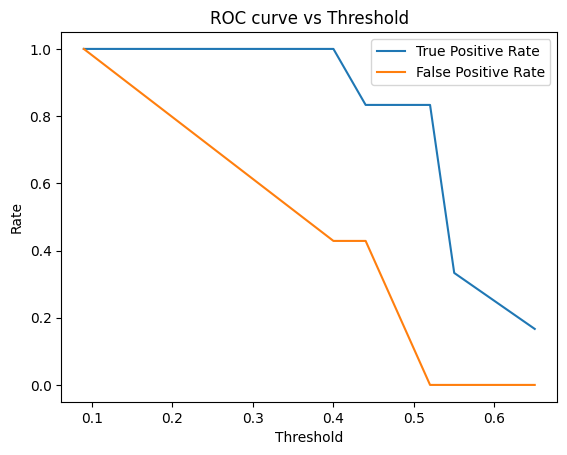

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# y_test is actual labels for test data (train-test split me defined tha)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot(thresholds, tpr, label='True Positive Rate')
plt.plot(thresholds, fpr, label='False Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('ROC curve vs Threshold')
plt.legend()
plt.show()


In [ ]:
import joblib

# Apna trained model wahan load karo jahan saved ho
model = joblib.load('/content/drive/MyDrive/Research_project/augmented_trained_model.pkl')  # apne model path ke hisab se update karo

# Agar aapke model me feature_names_in_ attribute hai tab use karo, varna manually feature names define karo
if hasattr(model, 'feature_names_in_'):
    features = model.feature_names_in_.tolist()
else:
    # Agar aapke paas training data ka feature list already hai toh use load karke
    # yahan manually list bhi de sakte hain jaise:
    # features = ['feature1', 'feature2', 'feature3']
    print("Model me feature names nahi hain. Feature list manually dena hoga.")
    features = []

# Feature list ko file me save karo
joblib.dump(features, '/content/drive/MyDrive/Research_project/features_list.pkl')
print("Features list saved successfully.")


Features list saved successfully.


In [ ]:
import pandas as pd
import numpy as np

areas = [
    "Churchgate", "Marine Lines", "Charni Road", "Grant Road", "Mumbai Central", "Mahalaxmi",
    "Lower Parel", "Prabhadevi", "Dadar", "Matunga Road", "Mahim", "Bandra", "Khar Road",
    "Santacruz", "Vile Parle", "Andheri", "Goregaon", "Malad", "Kandivali", "Borivali",
    "Dahisar", "Mira Road", "Bhayandar", "Vasai Road", "CSMT", "Masjid", "Sandhurst Road",
    "Byculla", "Chinchpokli", "Parel", "Currey Road", "Matunga",
    "Sion", "Kurla", "Vidyavihar", "Ghatkopar", "Vikhroli", "Kanjur Marg",
    "Bhandup", "Mulund", "Thane"
]

n_samples = 2000
np.random.seed(42)

data = {
    "Area": np.random.choice(areas, n_samples),
    "Day": np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], n_samples),
    "Hour": np.random.randint(0, 24, n_samples),
}

df = pd.DataFrame(data)

def congestion_label(row):
    score = 0
    # Approximate peak hour logic
    if 7 <= row["Hour"] <= 11 or 17 <= row["Hour"] <= 21:
        score += 1
    # Example: congested areas have more weight
    if row["Area"] in ["Kandivali", "Andheri", "Borivali", "Dadar", "CSMT", "Thane"]:
        score += 1
    return 1 if score >= 2 else 0

df["Congestion"] = df.apply(congestion_label, axis=1)

print(df.head())


          Area      Day  Hour  Congestion
0      Bhandup  Tuesday     4           0
1  Chinchpokli   Monday     5           0
2   Vile Parle   Sunday     6           0
3   Prabhadevi  Tuesday    20           0
4      Dahisar   Friday     0           0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_area = LabelEncoder()
df["Area_enc"] = le_area.fit_transform(df["Area"])

le_day = LabelEncoder()
df["Day_enc"] = le_day.fit_transform(df["Day"])

features = ["Area_enc", "Day_enc", "Hour"]
X = df[features]
y = df["Congestion"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9675
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       380
           1       1.00      0.35      0.52        20

    accuracy                           0.97       400
   macro avg       0.98      0.68      0.75       400
weighted avg       0.97      0.97      0.96       400



In [ ]:
input_area = input("Enter area (e.g., Kandivali): ")
input_day = input("Enter day (e.g., Monday): ")
input_hour_str = input("Enter current hour (0-23 or HH:MM): ")

try:
    input_hour = int(input_hour_str.split(":")[0])
except:
    print("Invalid hour format. Please enter hour as 0-23 or HH:MM.")
    raise

try:
    area_val = le_area.transform([input_area])[0]
    day_val = le_day.transform([input_day.capitalize()])[0]
except ValueError:
    print("Input error: Area or Day not recognized. Check spelling and capitalization.")
else:
    input_features = [[area_val, day_val, input_hour]]
    prediction = model.predict(input_features)[0]
    if prediction == 1:
        print(f"Traffic congestion likely in {input_area} now.")
    else:
        print(f"Traffic likely smooth in {input_area} now.")


Enter area (e.g., Kandivali): Kandivali
Enter day (e.g., Monday): Monday
Enter current hour (0-23 or HH:MM): 12:30
Traffic likely smooth in Kandivali now.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# (Yeh Colab ya Flask me ek script ke roop me chalega)
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Areas list (Mumbai stations)
areas = [
    "Churchgate", "Marine Lines", "Charni Road", "Grant Road", "Mumbai Central", "Mahalaxmi",
    "Lower Parel", "Prabhadevi", "Dadar", "Matunga Road", "Mahim", "Bandra", "Khar Road",
    "Santacruz", "Vile Parle", "Andheri", "Goregaon", "Malad", "Kandivali", "Borivali",
    "Dahisar", "Mira Road", "Bhayandar", "Vasai Road", "CSMT", "Masjid", "Sandhurst Road",
    "Byculla", "Chinchpokli", "Parel", "Currey Road", "Matunga",
    "Sion", "Kurla", "Vidyavihar", "Ghatkopar", "Vikhroli", "Kanjur Marg",
    "Bhandup", "Mulund", "Thane"
]

n_samples = 5000
np.random.seed(42)

data = {
    "Area": np.random.choice(areas, n_samples),
    "Day": np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], n_samples),
    "Hour": np.random.randint(0, 24, n_samples),
}

df = pd.DataFrame(data)

def congestion_label(row):
    score = 0
    if 7 <= row["Hour"] <= 11 or 17 <= row["Hour"] <= 21:
        score += 1
    if row["Area"] in ["Kandivali", "Andheri", "Borivali", "Dadar", "CSMT", "Thane"]:
        score += 1
    return 1 if score >= 2 else 0

df["Congestion"] = df.apply(congestion_label, axis=1)

# Label encode
le_area = LabelEncoder()
le_day = LabelEncoder()
df["Area_enc"] = le_area.fit_transform(df["Area"])
df["Day_enc"] = le_day.fit_transform(df["Day"])

X = df[["Area_enc", "Day_enc", "Hour"]]
y = df["Congestion"]

# Train RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)


RandomForestClassifier(random_state=42)

In [ ]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(le_area, 'labelencoder_area.pkl')
joblib.dump(le_day, 'labelencoder_day.pkl')


['labelencoder_day.pkl']

In [ ]:
test_X = [[le_area.transform(['Dadar'])[0], le_day.transform(['Monday'])[0], 9],   # Peak hour
          [le_area.transform(['Kandivali'])[0], le_day.transform(['Friday'])[0], 18]]  # Peak hour

model.predict(test_X)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

In [ ]:
def congestion_label(row):
    score = 0
    if 7 <= row["Hour"] <= 11 or 17 <= row["Hour"] <= 21:
        score += 2  # Peak hours weight badhaya
    if row["Area"] in ["Kandivali", "Andheri", "Borivali", "Dadar", "CSMT", "Thane"]:
        score += 1
    return 1 if score >= 2 else 0


In [ ]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


In [ ]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(le_area, 'labelencoder_area.pkl')
joblib.dump(le_day, 'labelencoder_day.pkl')


['labelencoder_day.pkl']

In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(le_area, 'labelencoder_area.pkl')
joblib.dump(le_day, 'labelencoder_day.pkl')


['labelencoder_day.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Step 1: Naye aur purane stations ki list bana lo
stations = [
    "Churchgate", "Marine Lines", "Charni Road", "Grant Road", "Mumbai Central", "Mahalaxmi", "Lower Parel",
    "Elphinstone Road", "Dadar", "Malad", "Andheri", "Kandivali", "Mira Road", "Vasai", "Virar",
    "CSMT", "Masjid", "Sandhurst Road", "Byculla", "Dadar Central", "Kurla", "Vidyavihar",
    "Ghatkopar", "Vikhroli", "Kanjurmarg", "Bhandup", "Mulund", "Thane", "Diva", "Kalyan"
]

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hours = list(range(24))

# Step 2: Synthetic data generation (example, aap realistic data ke liye customize kar sakte hain)
data = []
for station in stations:
    for day in days:
        for hour in hours:
            congestion = 0
            # Example congestion condition
            if station in ["Dadar", "Andheri", "Borivali", "CSMT", "Thane"] and (7 <= hour <= 11 or 17 <= hour <= 21):
                congestion = 1
            data.append([station, day, hour, congestion])

df = pd.DataFrame(data, columns=["Area", "Day", "Hour", "Congestion"])

# Step 3: Encode categorical variables
le_area = LabelEncoder()
le_day = LabelEncoder()
df["Area_enc"] = le_area.fit_transform(df["Area"])
df["Day_enc"] = le_day.fit_transform(df["Day"])

# Step 4: Prepare train data
X = df[["Area_enc", "Day_enc", "Hour"]]
y = df["Congestion"]

# Step 5: Train model
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X, y)

# Step 6: Save model and encoders
joblib.dump(model, 'model.pkl')
joblib.dump(le_area, 'labelencoder_area.pkl')
joblib.dump(le_day, 'labelencoder_day.pkl')

print("Model and encoders saved successfully.")


Model and encoders saved successfully.


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(le_area, 'labelencoder_area.pkl')
joblib.dump(le_day, 'labelencoder_day.pkl')


['labelencoder_day.pkl']

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

stations = [
    "Churchgate", "Marine Lines", "Charni Road", "Grant Road", "Mumbai Central", "Mahalaxmi",
    "Lower Parel", "Elphinstone Road", "Dadar", "Malad", "Andheri", "Kandivali", "Mira Road",
    "Vasai", "Virar", "CSMT", "Masjid", "Sandhurst Road", "Byculla", "Dadar Central", "Kurla",
    "Vidyavihar", "Ghatkopar", "Vikhroli", "Kanjurmarg", "Bhandup", "Mulund", "Thane", "Diva",
    "Kalyan", "WEH Bandra", "WEH Kandivali", "WEH Borivali", "WEH Dahisar", "WEH Vasai",
    "EEH Ghatkopar", "EEH Mulund", "EEH Thane", "EEH Bhiwandi"
]

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hours = list(range(24))

# Synthetic data generate karo
data = []
for station in stations:
    for day in days:
        for hour in hours:
            congestion = 1 if station in ["Dadar", "Andheri", "CSMT", "Thane", "WEH Bandra", "EEH Thane"] and (7 <= hour <= 11 or 17 <= hour <= 21) else 0
            data.append([station, day, hour, congestion])

df = pd.DataFrame(data, columns=["Area", "Day", "Hour", "Congestion"])

# Label encoding
le_area = LabelEncoder()
le_area.fit(stations)  # Yahan important hai - pure stations yahan fit karna
le_day = LabelEncoder()
le_day.fit(days)

df["Area_enc"] = le_area.transform(df["Area"])
df["Day_enc"] = le_day.transform(df["Day"])

X = df[["Area_enc", "Day_enc", "Hour"]]
y = df["Congestion"]

# Model train
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X, y)

# Files save karo
joblib.dump(model, "model.pkl")
joblib.dump(le_area, "labelencoder_area.pkl")
joblib.dump(le_day, "labelencoder_day.pkl")

print("Nayi model files ban gayi hain, Flask folder me replace kar do.")


Nayi model files ban gayi hain, Flask folder me replace kar do.


In [ ]:
print(stations)
print(le_area.classes_)


['Churchgate', 'Marine Lines', 'Charni Road', 'Grant Road', 'Mumbai Central', 'Mahalaxmi', 'Lower Parel', 'Elphinstone Road', 'Dadar', 'Malad', 'Andheri', 'Kandivali', 'Mira Road', 'Vasai', 'Virar', 'CSMT', 'Masjid', 'Sandhurst Road', 'Byculla', 'Dadar Central', 'Kurla', 'Vidyavihar', 'Ghatkopar', 'Vikhroli', 'Kanjurmarg', 'Bhandup', 'Mulund', 'Thane', 'Diva', 'Kalyan', 'WEH Bandra', 'WEH Kandivali', 'WEH Borivali', 'WEH Dahisar', 'WEH Vasai', 'EEH Ghatkopar', 'EEH Mulund', 'EEH Thane', 'EEH Bhiwandi']
['Andheri' 'Bhandup' 'Byculla' 'CSMT' 'Charni Road' 'Churchgate' 'Dadar'
 'Dadar Central' 'Diva' 'EEH Bhiwandi' 'EEH Ghatkopar' 'EEH Mulund'
 'EEH Thane' 'Elphinstone Road' 'Ghatkopar' 'Grant Road' 'Kalyan'
 'Kandivali' 'Kanjurmarg' 'Kurla' 'Lower Parel' 'Mahalaxmi' 'Malad'
 'Marine Lines' 'Masjid' 'Mira Road' 'Mulund' 'Mumbai Central'
 'Sandhurst Road' 'Thane' 'Vasai' 'Vidyavihar' 'Vikhroli' 'Virar'
 'WEH Bandra' 'WEH Borivali' 'WEH Dahisar' 'WEH Kandivali' 'WEH Vasai']
